In [12]:
%pip install umap-learn --quiet

Note: you may need to restart the kernel to use updated packages.


Load necessary libraries.

In [13]:
## Basics
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## ML Packages
import umap
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import SpectralEmbedding, TSNE

## Msc
from adjustText import adjust_text
from itertools import combinations

Load dataset.

In [14]:
df = pd.read_csv('00_authors.csv').rename(columns = {'Unnamed: 0': 'Author'}).drop(columns = 'BookID')
X = df.copy().drop(['Author'], axis=1)

# Spectral Embeddings

In [15]:
X_illustrate = X.copy()
X_illustrate.index = [f'Chapter{i}' for i in range(X_illustrate.shape[0])]
X_illustrate

,a,all,also,an,and,any,are,as,at,be,...,was,were,what,when,which,who,will,with,would,your
Chapter0,46,12,0,3,66,9,4,16,13,13,...,40,11,7,5,6,8,4,9,1,0
Chapter1,35,10,0,7,44,4,3,18,16,9,...,27,13,5,7,7,3,5,14,8,0
Chapter2,46,2,0,3,40,1,13,11,9,23,...,24,6,10,4,6,4,5,15,3,9
Chapter3,40,7,0,4,64,3,3,20,13,20,...,26,10,3,6,10,5,3,22,4,3
Chapter4,29,5,0,6,52,5,14,17,6,16,...,23,5,8,4,13,2,4,21,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chapter836,32,4,0,6,33,0,7,8,4,18,...,0,1,13,2,3,3,11,17,5,10
Chapter837,16,5,0,5,49,1,6,10,3,24,...,1,1,6,5,6,0,11,20,2,7
Chapter838,22,15,0,3,48,0,9,10,2,13,...,4,0,16,2,2,0,12,15,1,10
Chapter839,25,4,0,8,59,3,6,7,3,13,...,3,4,11,2,2,2,22,23,4,5


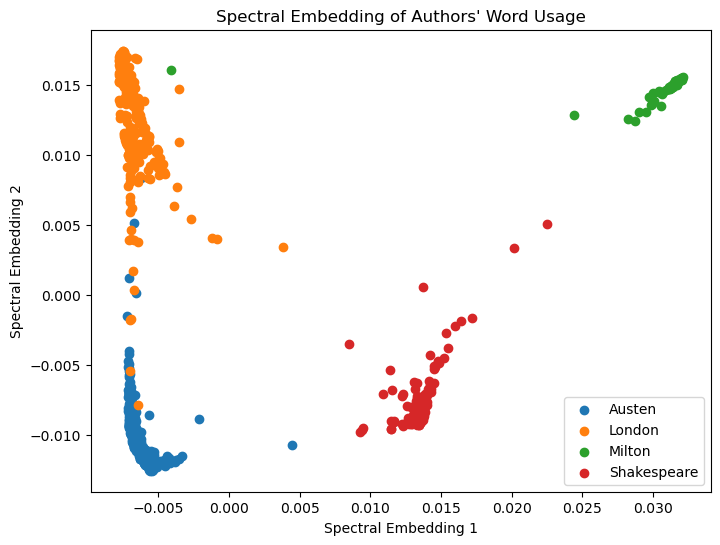

In [16]:
authors = df['Author'].values  # n_samples-length array

# Spectral Embedding
spectral = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10, random_state=0)
X_spec = spectral.fit_transform(X)  # shape: (n_samples, 2)

# Plotting
plt.figure(figsize=(8, 6))
for author in ['Austen', 'London', 'Milton', 'Shakespeare']:
    mask = (authors == author)
    plt.scatter(X_spec[mask, 0], X_spec[mask, 1], label=author)

plt.xlabel("Spectral Embedding 1")
plt.ylabel("Spectral Embedding 2")
plt.title("Spectral Embedding of Authors' Word Usage")
plt.legend(loc="lower right")
plt.show()


Rows = words; Columns = chapters .

In [17]:
X_transpose = X.T
X_transpose = X_transpose.rename(columns = {i:f'Chapter{i}' for i in range(df.shape[0])})
X_transpose

,Chapter0,Chapter1,Chapter2,Chapter3,Chapter4,Chapter5,Chapter6,Chapter7,Chapter8,Chapter9,...,Chapter831,Chapter832,Chapter833,Chapter834,Chapter835,Chapter836,Chapter837,Chapter838,Chapter839,Chapter840
a,46,35,46,40,29,27,34,38,34,54,...,46,48,39,22,28,32,16,22,25,26
all,12,10,2,7,5,8,8,6,12,8,...,4,2,5,13,7,4,5,15,4,4
also,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
an,3,7,3,4,6,3,15,2,5,6,...,3,9,10,5,7,6,5,3,8,2
and,66,44,40,64,52,42,44,67,50,44,...,43,45,38,47,45,33,49,48,59,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
who,8,3,4,5,2,6,4,6,1,3,...,1,0,2,4,2,3,0,0,2,3
will,4,5,5,3,4,3,9,7,2,5,...,7,10,8,9,7,11,11,12,22,11
with,9,14,15,22,21,18,11,15,13,15,...,18,11,26,12,8,17,20,15,23,19
would,1,8,3,4,10,4,6,3,12,6,...,2,6,2,6,3,5,2,1,4,0


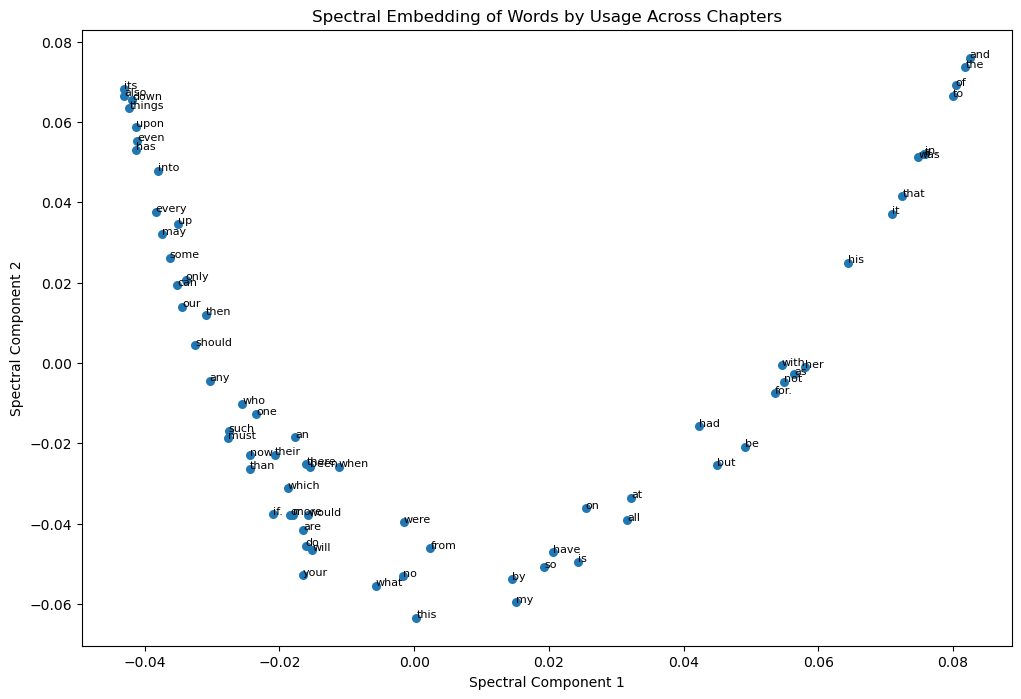

In [18]:
# Convert to NumPy array
X_words = X_transpose.to_numpy()

# Apply Spectral Embedding
spectral = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10, random_state=0)
X_words_spec = spectral.fit_transform(X_words)

# Plotting the words
plt.figure(figsize=(12, 8))
plt.scatter(X_words_spec[:, 0], X_words_spec[:, 1], s=30)

# Optional: add word labels
for i, word in enumerate(X_transpose.index):
    plt.text(X_words_spec[i, 0], X_words_spec[i, 1], word, fontsize=8)

plt.title("Spectral Embedding of Words by Usage Across Chapters")
plt.xlabel("Spectral Component 1")
plt.ylabel("Spectral Component 2")
plt.show()


# UMAP

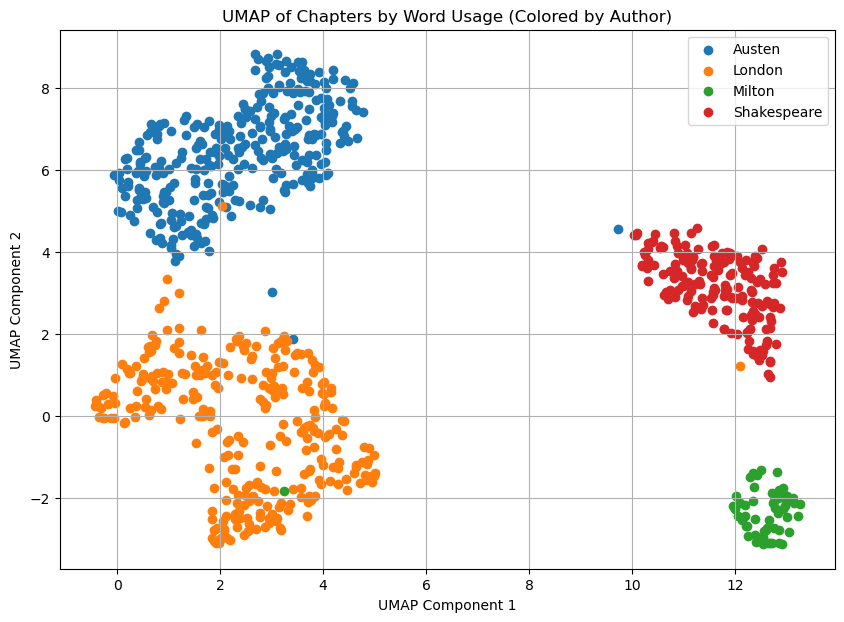

In [19]:
random_state=None
X_chapters = X.to_numpy() # Convert to NumPy
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.3, n_jobs=-1) # Fit UMAP
X_umap = umap_model.fit_transform(X_chapters)

# Plotting the UMAP components
plt.figure(figsize=(10, 7))
for author in ['Austen', 'London', 'Milton', 'Shakespeare']:
    mask = (authors == author)
    plt.scatter(X_umap[mask, 0], X_umap[mask, 1], label=author)

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP of Chapters by Word Usage (Colored by Author)")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


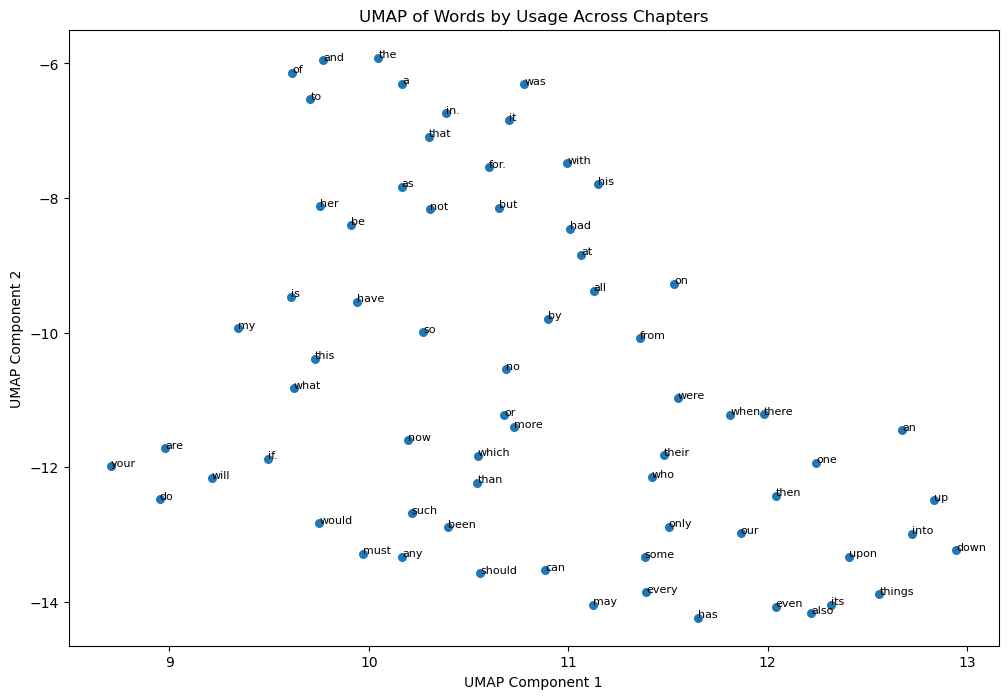

In [20]:
random_state=None
X_words = X_transpose.to_numpy() # Convert to NumPy
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.3, n_jobs=-1) # Fit UMAP
X_words_umap = umap_model.fit_transform(X_words)

# Plot w/ word labels
plt.figure(figsize=(12, 8))
plt.scatter(X_words_umap[:, 0], X_words_umap[:, 1], s=30)
for i, word in enumerate(X_transpose.index):
    plt.text(X_words_umap[i, 0], X_words_umap[i, 1], word, fontsize=8)
plt.title("UMAP of Words by Usage Across Chapters")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()


# tSNE

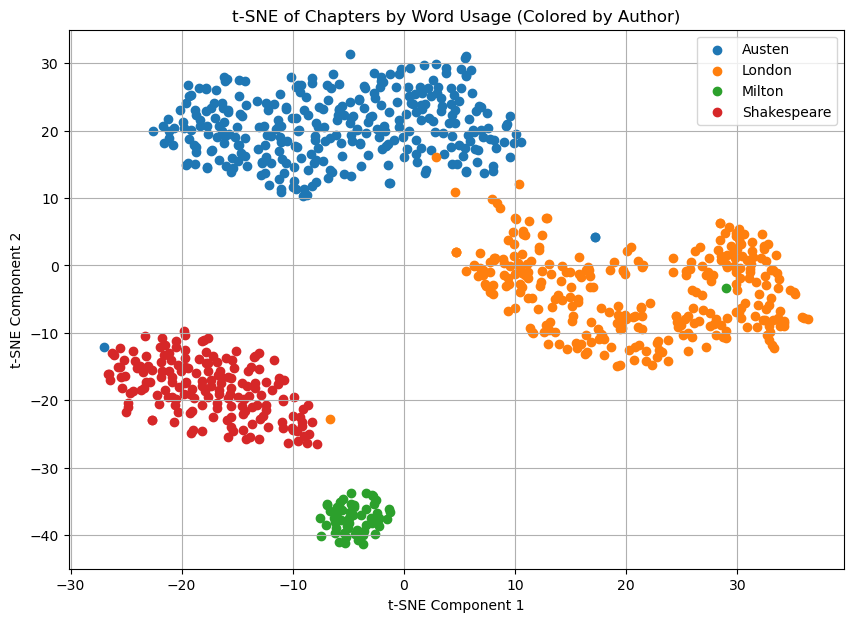

In [21]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto') # Fit t-SNE
X_tsne = tsne.fit_transform(X_chapters)

# Plot chapters with author labels
plt.figure(figsize=(10, 7))
for author in ['Austen', 'London', 'Milton', 'Shakespeare']:
    mask = (authors == author)
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=author)

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE of Chapters by Word Usage (Colored by Author)")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()


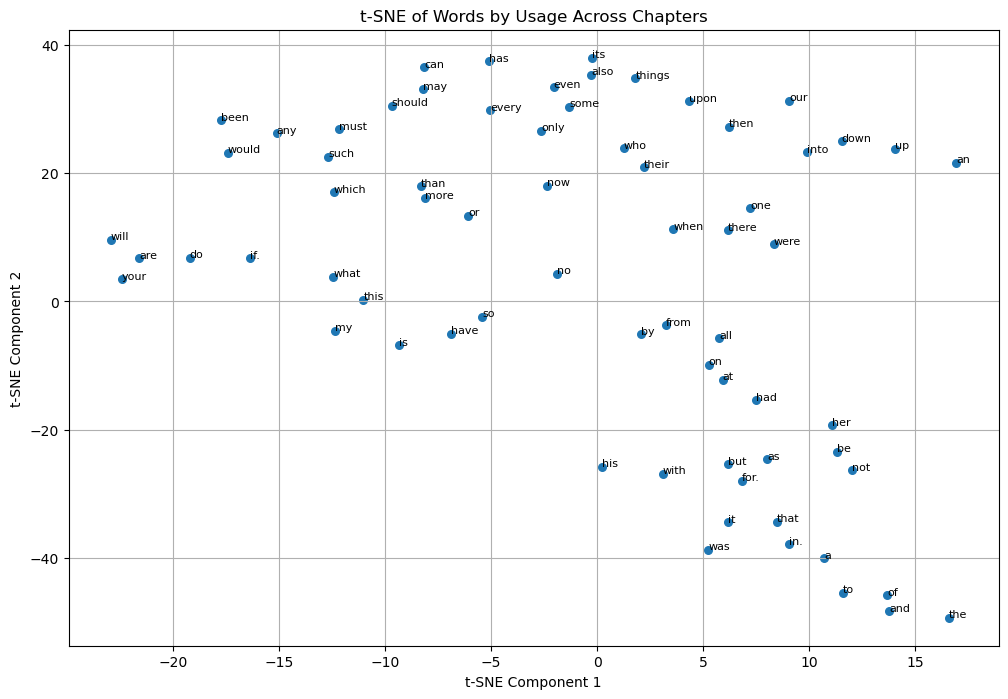

In [22]:
tsne = TSNE(n_components=2, perplexity=5, learning_rate='auto') # Fit t-SNE
X_words_tsne = tsne.fit_transform(X_words)

# Plot w/ word labels
plt.figure(figsize=(12, 8))
plt.scatter(X_words_tsne[:, 0], X_words_tsne[:, 1], s=30)
for i, word in enumerate(X_transpose.index):
    plt.text(X_words_tsne[i, 0], X_words_tsne[i, 1], word, fontsize=8)

plt.title("t-SNE of Words by Usage Across Chapters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True)
plt.show()
